In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange
from math import sqrt
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv("dataset.csv")
data = df

In [ ]:
mv_columna = df.pop('diagnosis')
df['diagnosis'] = mv_columna

In [ ]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


<Axes: >

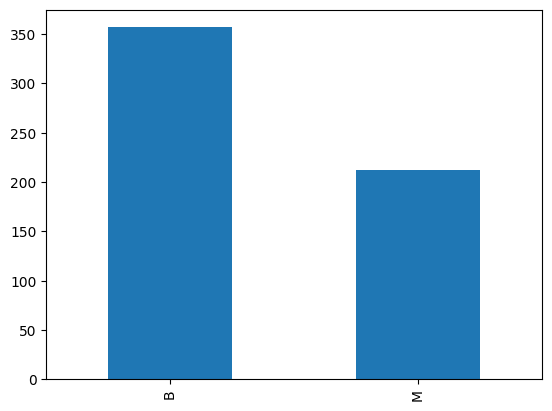

In [ ]:
df['diagnosis'].value_counts().plot.bar()

In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
df = df.values.tolist()
df = [fila[1:] for fila in df]
print(df)

[[17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189, 'M'], [20.57, 17.77, 132.9, 1326.0, 0.08474, 0.07864, 0.0869, 0.07017, 0.1812, 0.05667, 0.5435, 0.7339, 3.398, 74.08, 0.005225, 0.01308, 0.0186, 0.0134, 0.01389, 0.003532, 24.99, 23.41, 158.8, 1956.0, 0.1238, 0.1866, 0.2416, 0.186, 0.275, 0.08902, 'M'], [19.69, 21.25, 130.0, 1203.0, 0.1096, 0.1599, 0.1974, 0.1279, 0.2069, 0.05999, 0.7456, 0.7869, 4.585, 94.03, 0.00615, 0.04006, 0.03832, 0.02058, 0.0225, 0.004571, 23.57, 25.53, 152.5, 1709.0, 0.1444, 0.4245, 0.4504, 0.243, 0.3613, 0.08758, 'M'], [11.42, 20.38, 77.58, 386.1, 0.1425, 0.2839, 0.2414, 0.1052, 0.2597, 0.09744, 0.4956, 1.156, 3.445, 27.23, 0.00911, 0.07458, 0.05661, 0.01867, 0.05963, 0.009208, 14.91, 26.5, 98.87, 567.7, 0.2098, 0.8663, 0.6869, 0.2575, 0.6638, 0.173, 'M'], [20.29, 14.34, 1

In [ ]:
def str_column_to_int(dataset, column):
  class_values = [row[column] for row in dataset]
  unique = set(class_values)
  lookup = dict()
  for i, value in enumerate(unique):
    lookup[value] = i
    print('[%s] => %d' % (value, i))
  for row in dataset:
    row[column] = lookup[row[column]]
  return lookup

In [ ]:
str_column_to_int(df, len(df[0])-1)

[B] => 0
[M] => 1


{'B': 0, 'M': 1}

In [ ]:
data = data.iloc[:,1:]
data = data.iloc[:,:-1]

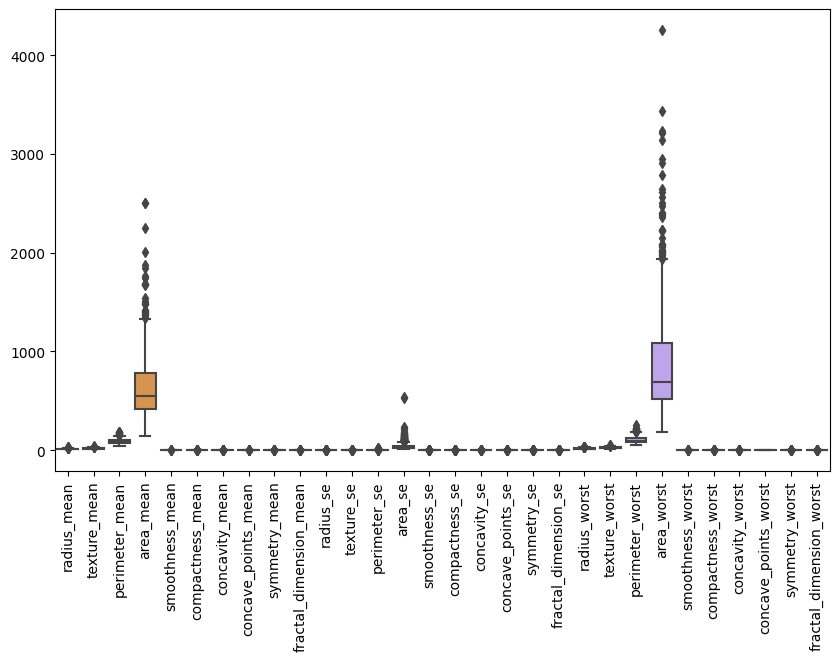

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot (data = data)
plt.xticks(rotation = 90);

In [ ]:
scaler = MinMaxScaler ()
X_scaled = scaler.fit_transform(data)

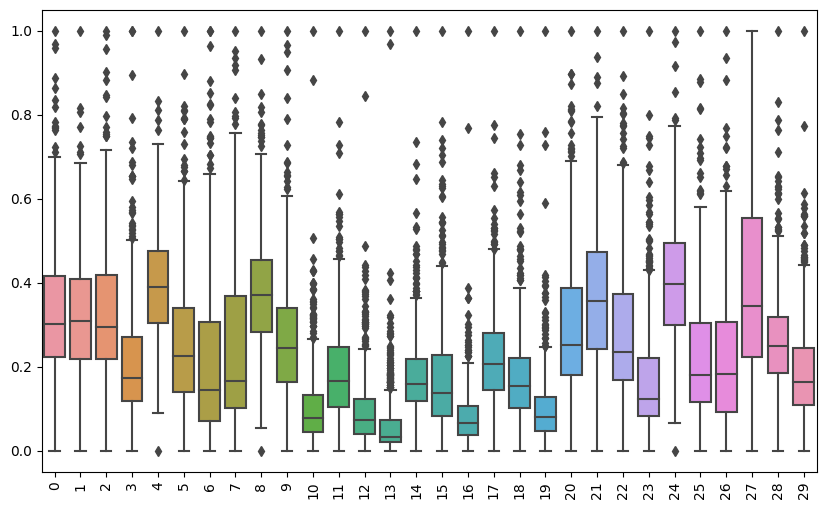

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot (data = X_scaled)
plt.xticks(rotation = 90);

In [ ]:
X_scaled = scaler.fit_transform(df)
df = X_scaled.tolist()
valores_maximos = scaler.data_max_
valores_minimos = scaler.data_min_

print("Valores máximos después del escalado:", valores_maximos)
print("Valores mínimos después del escalado:", valores_minimos)

Valores máximos después del escalado: [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01 1.000e+00]
Valores mínimos después del escalado: [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02 0.000e+00]


In [ ]:
def k_nearest_neighbors(train, test, num_neighbors):
  predictions = list()
  for row in test:
    output = predict_classification(train, row, num_neighbors)
    predictions.append(output)
  return(predictions)

In [ ]:
def predict_classification(train, test_row, num_neighbors):
  neighbors = get_neighbors(train, test_row, num_neighbors)
  output_values = [row[-1] for row in neighbors]
  prediction = max(set(output_values), key=output_values.count)
  return prediction

In [ ]:
def get_neighbors(train, test_row, num_neighbors):
  distances = list()
  for train_row in train:
    dist = euclidean_distance(test_row, train_row)
    distances.append((train_row, dist))
  distances.sort(key=lambda tup: tup[1])
  neighbors = list()
  for i in range(num_neighbors):
    neighbors.append(distances[i][0])
  return neighbors

In [ ]:
def euclidean_distance(row1, row2):
  distance = 0.0
  for i in range(len(row1)-1):
    distance += (row1[i] - row2[i])**2
  return sqrt(distance)

In [ ]:
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
  folds = cross_validation_split(dataset, n_folds)
  scores = list()
  df_predict = list()
  df_true = list()
  for fold in folds:
    train_set = list(folds)
    train_set.remove(fold)
    train_set = sum(train_set, [])
    test_set = list()
    for row in fold:
      row_copy = list(row)
      test_set.append(row_copy)
      row_copy[-1] = None
    predicted = algorithm(train_set, test_set, *args)
    actual = [row[-1] for row in fold]
    accuracy = accuracy_metric(actual, predicted)
    scores.append(accuracy)
  return scores

In [ ]:
def confusion_matriz(dataset, test,*args):
  actual = [row[-1] for row in test]
  predicted = k_nearest_neighbors(dataset, test, *args)
  accuracy = accuracy_metric(actual, predicted)
  print(accuracy)

  accuracy = accuracy_metric(actual, predicted)
  cm_7 = confusion_matrix(actual, predicted)
  print('Confusion matrix\n\n', cm_7)
  print('\nTrue Positives(TP) = ', cm_7[0,0])
  print('\nTrue Negatives(TN) = ', cm_7[1,1])
  print('\nFalse Positives(FP) = ', cm_7[0,1])
  print('\nFalse Negatives(FN) = ', cm_7[1,0])
  chart_matriz(cm_7)

In [ ]:
def cross_validation_split(dataset, n_folds):
  dataset_split = list()
  dataset_copy = list(dataset)
  fold_size = int(len(dataset) / n_folds)
  for _ in range(n_folds):
    fold = list()
    if n_folds==1:
      fold.append(dataset_copy)
    else:
      while len(fold) < fold_size:
        index = randrange(len(dataset_copy))
        fold.append(dataset_copy.pop(index))
    dataset_split.append(fold)
  return dataset_split

In [ ]:
def accuracy_metric(actual, predicted):
  correct = 0
  for i in range(len(actual)):
    if actual[i] == predicted[i]:
      correct += 1
  return correct / float(len(actual)) * 100.0

In [ ]:
def chart_matriz(dataset):
  plt.figure(figsize=(6,4))

  cm_matrix = pd.DataFrame(data=dataset, columns=['Actual Positive:1', 'Actual Negative:0'],
                                  index=['Predict Positive:1', 'Predict Negative:0'])

  sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
train = [fila[:] for fila in df[:468]]
test = [fila[:] for fila in df[468:]]

98.01980198019803
Confusion matrix

 [[77  0]
 [ 2 22]]

True Positives(TP) =  77

True Negatives(TN) =  22

False Positives(FP) =  0

False Negatives(FN) =  2


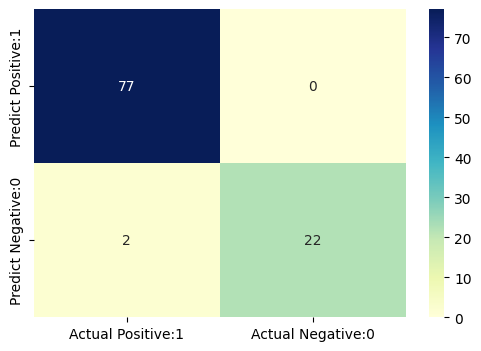

In [ ]:
num_neighbors = 21
confusion_matriz(train, test, num_neighbors)

In [ ]:
num_neighbors = 21
n_folds = 5
scores = evaluate_algorithm(df, k_nearest_neighbors, n_folds, num_neighbors)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [97.34513274336283, 98.23008849557522, 92.92035398230088, 96.46017699115043, 97.34513274336283]
Mean Accuracy: 96.460%


In [ ]:
def scale_data(dataset_list):
  valores_escalados = [(dato - min_val) / (max_val - min_val) for dato, max_val, min_val in zip(dataset_list, valores_maximos, valores_minimos)]
  return valores_escalados

In [ ]:
dato_a_predecir = [12,15.65,76.95,443.3,0.09723,0.07165,0.04151,0.01863,0.2079,0.05968,0.2271,1.255,1.441,16.16,0.005969,0.01812,0.02007,0.007027,0.01972,0.002607,13.67,24.9,87.78,567.9,0.1377,0.2003,0.2267,0.07632,0.3379,0.07924]
dato_a_predecir = scale_data(dato_a_predecir)
print(dato_a_predecir)

[0.2375408206730087, 0.20087926952992896, 0.22914795107456293, 0.12716861081654296, 0.4026360928049111, 0.16032758726458501, 0.09725866916588566, 0.0925944333996024, 0.5146464646464647, 0.20471777590564447, 0.0418613072605468, 0.19775459688826022, 0.03222918531781558, 0.01747858602385515, 0.14467824727198558, 0.11917565415928141, 0.05068181818181818, 0.13311233188103808, 0.16657285979625147, 0.05915315838204608, 0.20419779437922447, 0.34328358208955223, 0.18611484635689032, 0.09405721588674792, 0.43934491184045427, 0.1678551677969555, 0.18107028753993612, 0.2622680412371134, 0.3575793416124581, 0.15873015873015878]


In [ ]:
label = predict_classification(df, dato_a_predecir, num_neighbors)
print('Data=%s \n Prediccion: %s' % (dato_a_predecir, label))

Data=[0.2375408206730087, 0.20087926952992896, 0.22914795107456293, 0.12716861081654296, 0.4026360928049111, 0.16032758726458501, 0.09725866916588566, 0.0925944333996024, 0.5146464646464647, 0.20471777590564447, 0.0418613072605468, 0.19775459688826022, 0.03222918531781558, 0.01747858602385515, 0.14467824727198558, 0.11917565415928141, 0.05068181818181818, 0.13311233188103808, 0.16657285979625147, 0.05915315838204608, 0.20419779437922447, 0.34328358208955223, 0.18611484635689032, 0.09405721588674792, 0.43934491184045427, 0.1678551677969555, 0.18107028753993612, 0.2622680412371134, 0.3575793416124581, 0.15873015873015878] 
 Prediccion: 0.0
